In [ ]:
#Description of Data: The dataset here is a sample of the transactions made in a retail store during Black Friday. 
#The dataset comes from a competition hosted by Analytics Vidhya. The dataset was provided by kaggle.

In [ ]:
#Problem:
#I found the dataset to be interesting because I wanted to understand if the data could answer the following questions:

#What is the highest Black Friday purchase amount by Age?
#What is the gender of the age group with the highest amount of purchases?
#Based on the gender with the highest purchase amount are they more likely to be married (i.e. what is there marital status)?
#What is the average purchase amount by occupation and gender?
#What is the purchase amount frequency by gender? How much variation is between the two genders? 
#What is the percent of purchase amount by Gender?

In [1]:
#Hypothesis

#Based on my shopping habits and many of my female friends during Black Friday, I naturally assume the highest purchase amount would be around $150,000,000.00 million.
#I also would assume that married women between 36 and 40 would have a greater purchasing amount.
#I would expect the average purchase amount to be about 20,000 for females and 10,000 for males. 
# I would expect females to represent the highest frequency in purchase amount with about 80% of the purchases being made by females and 20% for males. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
#import matplotlib.ticker as tkr
%matplotlib inline

In [3]:
#Load the file into a data frame
df = pd.read_csv('BlackFriday.csv')

In [4]:
#Let's see the statistics of the data to get an idea of the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
#Let's see the columns and first 5 rows of data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


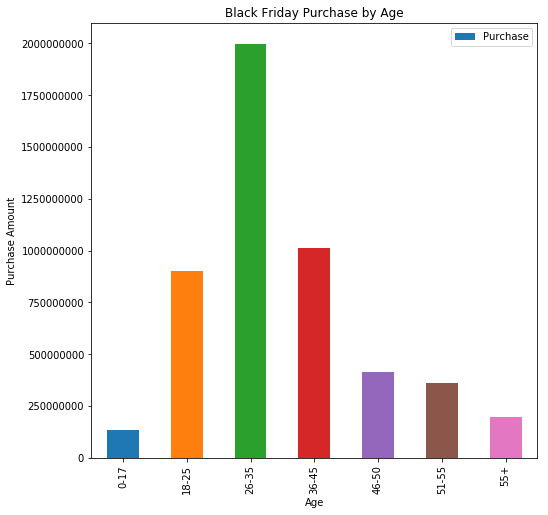

In [5]:
#Now let's begin to answer to some questions
#What is the highest Black Friday purchase amount by Age?
df.groupby('Age')['Purchase'].sum().plot(kind='bar', figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Purchase Amount')
plt.title('Black Friday Purchase by Age')
plt.legend()
plt.show()

In [ ]:
#Answer: The age group between 26-35 have the highest purchase amount. 
#Not very surprising to me as many people are settling into careers and families during this 
#age group as a result, I can understand why this group would spend more money on purchases #during Black Friday when deals are abundant.

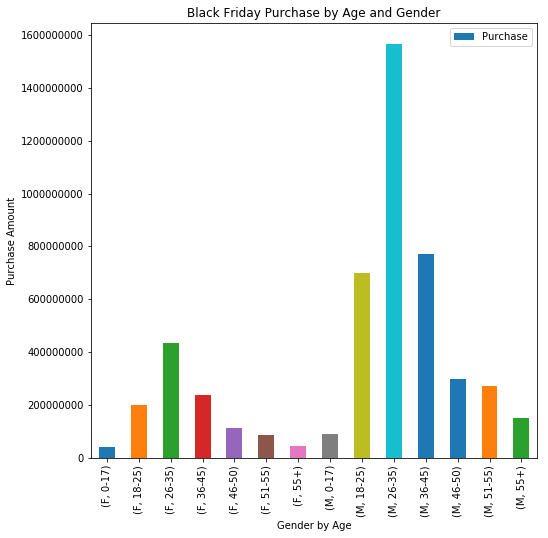

In [10]:
#What is the gender of the age group with the highest amount of purchases?
df.groupby(['Gender','Age'])['Purchase'].sum().plot(kind='bar', figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Purchase Amount')
plt.xlabel('Gender by Age')
plt.title('Black Friday Purchase by Age and Gender')
plt.legend()
plt.show()

In [ ]:
#Answer: This was by far was the most surprising result and completely blew my hypothesis out of the water. 
#I just naturally assumed that women would be the gender with the highest purchasing amount, not men.
#if I had to guess why this would be the case, maybe men wait until this time of year to buy their items of interest.
#Also, I think men typically know what they want to buy so Black Friday maybe the perfect opportunity
#to buy all of their items at one time instead of shopping a lot throughout the year.

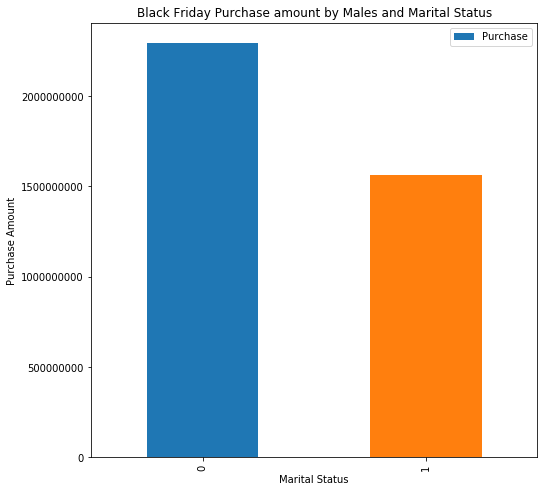

In [15]:
#Can we determine of the gender with the highest purchase amount are they more likely to be married or singled?
plot_male = df[df['Gender'] == 'M']
plot_male = plot_male.groupby('Marital_Status')['Purchase'].sum()
plot_male.plot(kind='bar', figsize=(8,8), stacked=False)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Purchase Amount')
plt.title('Black Friday Purchase amount by Males and Marital Status')
plt.xlabel('Marital Status')
plt.legend()
plt.show()

In [ ]:
#Answer: The data doesn’t give me a clear indication of what 0 and 1 represent (i.e. 0 being single and married being 1) 
#but if I had to guess, I would assume that 0 represents single and married represents 1.
#However, to answer the question correctly, I will just say the marital status of 0 has the highest purchase amount over
#the marital status of 1

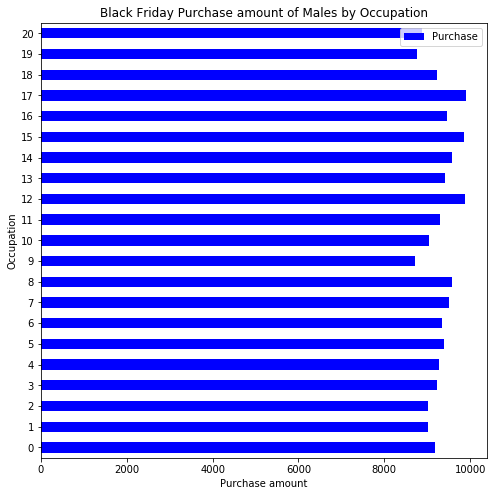

In [16]:
#What is the average purchase amount of males by occupation?
df[df['Gender'] == 'M']
df.groupby('Occupation')['Purchase'].mean().plot(kind='barh', figsize=(8,8), color='blue')
plt.ylabel('Occupation')
plt.xlabel('Purchase amount')
plt.title('Black Friday Purchase amount of Males by Occupation')
plt.legend()
plt.show()

In [ ]:
#Answer: Males with an Occupation 12, 15 and 17 are spending on average about $9800. Unfortunately, the data doesn’t 
#give me a real sense of what the occupation represents. It's an ordinal variable that doesn’t provide a lot of
#details. In order for this data point to add more value it would need to be categorized into something more meaningful like an exact occupation title (i.e. Doctor, Mechanic…etc)

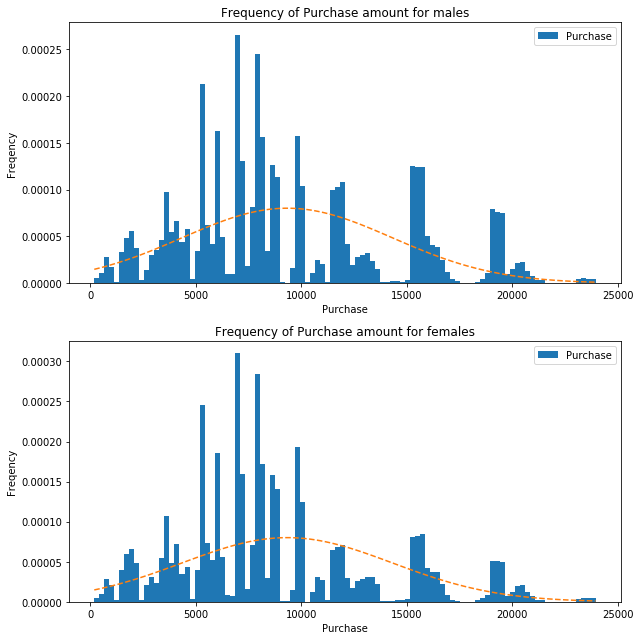

In [102]:
#What is the purchase amount frequency by gender? How much variation is between the two genders? 

mu = df['Purchase'].mean()  # mean of distribution
sigma = df['Purchase'].std()  # standard deviation of distribution
num_bins = 100                 #assign the number of bins

#filter the data by gender 
plot_male = df[df['Gender'] == 'M']
xm = plot_male['Purchase']

plot_female = df[df['Gender'] == 'F']
xf = plot_female['Purchase']

#fig, ax = plt.subplots(figsize=(9,9))
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(9,9))


# the histogram of the data for Males
n, bins, patches = ax0.hist(xm, num_bins, density=1)

# add a 'best fit' line
y = scipy.stats.norm.pdf(bins, mu, sigma)
ax0.plot(bins, y, '--')
ax0.set_xlabel('Purchase')
ax0.set_ylabel('Freqency')
ax0.set_title('Frequency of Purchase amount for males')
ax0.ticklabel_format(style='plain', axis='y')
ax0.legend()

# the histogram of the data for Females
n, bins, patches = ax1.hist(xf, num_bins, density=1)

# add a 'best fit' line
y = scipy.stats.norm.pdf(bins, mu, sigma)
ax1.plot(bins, y, '--')
ax1.set_xlabel('Purchase')
ax1.set_ylabel('Freqency')
ax1.set_title('Frequency of Purchase amount for females')
ax1.ticklabel_format(style='plain', axis='y')
ax1.legend()


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [ ]:
#Answer: I was surprise to see the purchasing amount between $0-5,000 was mostly the same for both genders but they start to show differences when the purchase amount was between $6,000 – 21,000. 
#Purchases between $6,000 - 8,000 were more frequent for females than males.
#Purchases greater than $12,000 and less than $21,000 were made more frequently for males than females, which
#indicate males were buying more frequently higher priced items during Black Friday.

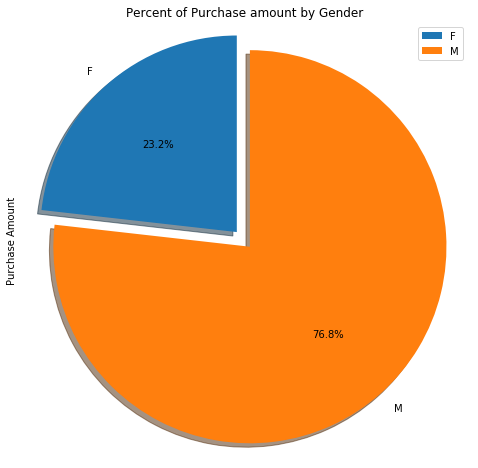

In [8]:
#What is the percent of purchase amount by Gender?

#Pie chart, where the slices will be ordered and plotted counter-clockwise:
#Group the data by gender then aggregate the data to get a sum
#only "explode" the 2nd slice (i.e. 'Females')

df.groupby(['Gender'])['Purchase'].sum().plot(kind='pie',explode=(0.0,0.1), 
        autopct='%1.1f%%',startangle=90, counterclock=True,shadow=True,figsize=(8,8))
plt.title('Percent of Purchase amount by Gender')
plt.axis('equal')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()

In [ ]:
#Answer: The pie graph shows that 76% of all purchases were made by males, which makes sense. 
#based on the graphs above we were able to see the males had the higher purchasing amount.

In [ ]:
#In conclusion I was completely wrong regarding my hypothesis.
#Males between the age of 26- 35 have the highest purchasing amount of about a little under $200,000,000 million.
#On average men with the occupation of 12, 15 and 17 are spending on about $9800.
#More frequent purchases between $6,000 - 8,000 were made by females than males. However, purchases 
#greater than $12,000 and less than $21,000 were made more frequently from males than females which
#indicate males were buying more frequently higher priced items during Black Friday. 
#and overall, males made about 76% of the total purchase amount as opposed to only 23% for females.

In [ ]:
#Further Research questions

#1. It would be great to understand what type of items men are buying.
#For example, usually during Black Friday electronics are a highly purchased item. It would be great to understand if there was a 
#clear correlation between high purchase amounts and electronics during Black Friday.

#Technique use to solve problem: 
#A. I would us is to categorize the purchase types (i.e electronic, household’s items, family goods...etc.) 
#B. Use a line plot to show the purchase amount by purchase types. 

#2. I would definitely like to know what the occupation represents. It would be helpful to understand if the 
#frequency purchase amount was being spent by men in occupation of doctors, lawyers, and other white collar 
#professionals or if the purchase amount were being represented by blue collar workers.

# Technique use to solve problem: 
#A. I would first categorize the data by occupation types. 
#B. Then I would use a histogram to show the distribution of the purchase amount by #occupation types. 

#C. Upon completion of gathering both datasets, I would like develop a regression model to determine which occupation is more likely to buy electronics. 
#is more likely to buy electronics.

